# Annotated 2d histograms of Russian elections

**WORK IN PROGRESS**

In [1]:
# Load libraries and set up notebook

%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns; sns.set()
import pandas as pd
from zipfile import ZipFile
import pickle
import time

import matplotlib as mpl
mpl.rcParams.update({'nbagg.transparent': False, 'figure.facecolor': 'white'})

In [2]:
# Load data for a given year

def loaddata(year):
    zip_file = ZipFile('electionsData.zip')
    
    #table = pd.read_csv('data/russia{}.csv.zip'.format(year), sep='\t')
    table = pd.read_csv(zip_file.open('{}.txt'.format(year)), sep='\t')
        
    colFilter = ['ПУТИН', 'Путин', 'Единая Россия', 'ЕДИНАЯ РОССИЯ', 'Медведев']
    col = [col for col in table.columns if any([f in col for f in colFilter])]
    leader = np.squeeze(table[col].values)
    
    colFilter = ['Число избирателей, включенных', 'Число избирателей, внесенных']
    col = [col for col in table.columns if any([f in col for f in colFilter])]
    voters = np.squeeze(table[col].values)
    
    colFilter = ['бюллетеней, выданных']                # should select 3 columns
    col = [col for col in table.columns if any([f in col for f in colFilter])]
    given = np.sum(table[col].values, axis=1)

    colFilter = ['действительных', 'недействительных']  # should select 2 columns
    excludeFilter = ['отметок']  # excludes one additional column in the 2000 data
    col = [col for col in table.columns if any([f in col for f in colFilter]) and 
                                           all([f not in col for f in excludeFilter])]
    received = np.sum(table[col].values, axis=1)
    
    regions = table['region'].values
    tiks = table['tik'].values
    
    return (voters, given, received, leader, regions, tiks)

<IPython.core.display.Javascript object>


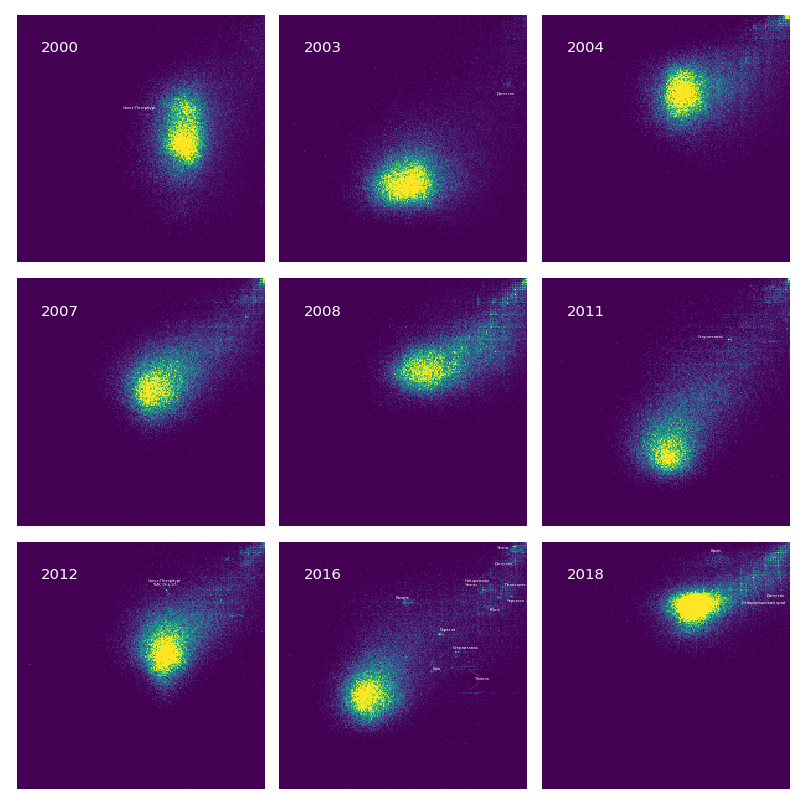

In [3]:
# 2D histograms for all years

years = [2000, 2003, 2004, 2007, 2008, 2011, 2012, 2016, 2018]
binwidth = 0.5
minSize = 0

edges = np.arange(-binwidth/2, 100+binwidth/2, binwidth)
centers = np.arange(0,100,binwidth)

plt.figure(figsize=(9,9))
for i,y in enumerate(years):
    voters, given, received, leader, regions, tiks = loaddata(y)

    plt.subplot(3, 3, i+1)
    ind = (received > 0) & (given < voters) & (voters >= minSize) & np.array(['Зарубеж' not in s and 'за пределами' not in s for s in regions])# & np.array(['Петерб' not in s for s in regions])
    h = np.histogram2d(100 * given[ind]/voters[ind], 100 * leader[ind]/received[ind], 
                       bins=edges, weights = voters[ind])[0]
    plt.imshow(h.T, vmin=0, vmax=50000, origin='lower', extent=[0,100,0,100], 
               cmap=plt.get_cmap('viridis'), interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.text(10,85,y, color='w')
    
    if y == 2000:
        plt.text(43, 62, 'Санкт-Петербург', color='w', fontsize=3)
    elif y == 2003:
        plt.text(88, 68, 'Дагестан', color='w', fontsize=3)
    elif y == 2011:
        plt.text(63, 76, 'Стерлитамак', color='w', fontsize=3)
    elif y == 2012:
        plt.text(60, 82, 'Санкт-Петербург\nТИК 19 & 27', ha='center', color='w', fontsize=3)
    elif y == 2016:
        plt.text(65, 64, 'Саратов', color='w', fontsize=3)
        plt.text(47, 77, 'Казань', color='w', fontsize=3)
        plt.text(75, 82, 'Набережные\nЧелны', color='w', fontsize=3)
        plt.text(88, 97, 'Чечня', color='w', fontsize=3)
        plt.text(87, 91, 'Дагестан', color='w', fontsize=3)
        plt.text(70, 56.5, 'Стерлитамак', color='w', fontsize=3)
        plt.text(62, 48, 'Уфа', color='w', fontsize=3)
        plt.text(79, 44, 'Тюмень', color='w', fontsize=3)
        plt.plot([77,81], [48, 45.5], color='w', linewidth=.1)        
        plt.plot([77,81], [40, 43], color='w', linewidth=.1)
        plt.text(92, 75.5, 'Черкесск', color='w', fontsize=3)
        plt.text(91, 82, 'Полысаево', color='w', fontsize=3)
        plt.text(85, 72, 'Юрга', color='w', fontsize=3)
    elif y == 2018:
        plt.text(68, 96, 'Крым', color='w', fontsize=3)
        plt.text(81, 75, 'Ставропольский край', color='w', fontsize=3)
        plt.plot([95.25,97], [94, 80], color='w', linewidth=.1)        
        plt.text(91, 78, 'Дагестан', color='w', fontsize=3)
        plt.plot([85.25, 88], [84, 77], color='w', linewidth=.1)

plt.tight_layout()

plt.savefig('comets.pdf')
# plt.savefig('comets.png', dpi=300)

## Exploration tools

<IPython.core.display.Javascript object>


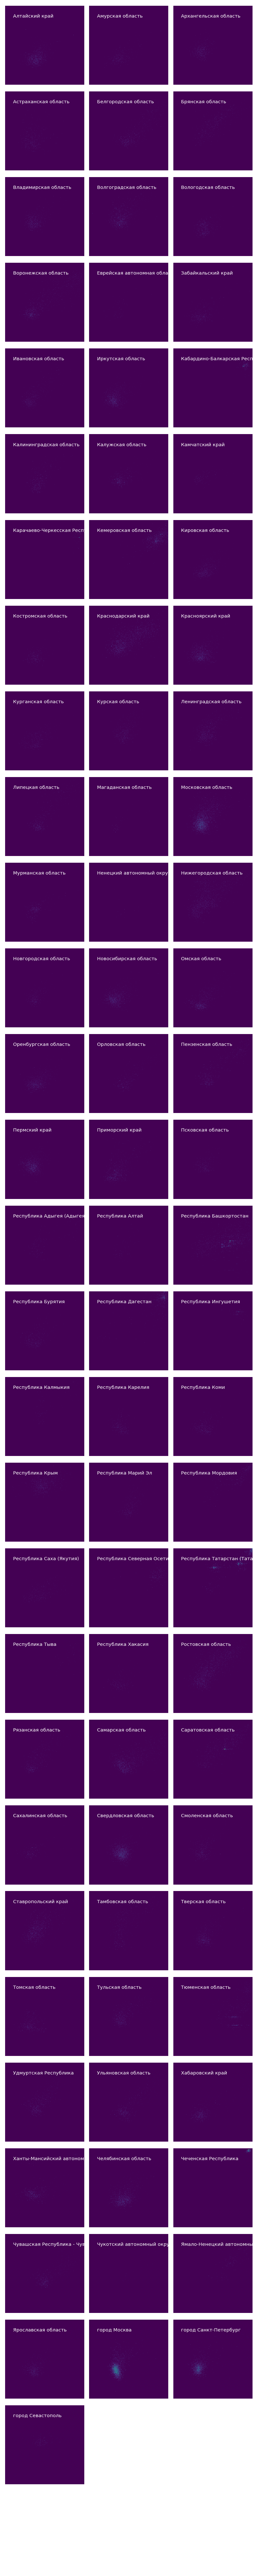

In [4]:
# 2D histograms for all regions in a given year

year = 2016
binwidth = 0.5

voters, given, received, leader, regions, tiks = loaddata(year)

edges = np.arange(-binwidth/2, 100+binwidth/2, binwidth)
centers = np.arange(0,100,binwidth)

plt.figure(figsize=(9,90))
for i,r in enumerate(np.unique(regions)):
    plt.subplot(30, 3, i+1)
    ind = (received > 0) & (given < voters) & (voters >= minSize) & (regions==r)
    h = np.histogram2d(100 * given[ind]/voters[ind], 100 * leader[ind]/received[ind], 
                       bins=edges, weights = voters[ind])[0]
    plt.imshow(h.T, vmin=0, vmax=50000, origin='lower', extent=[0,100,0,100], 
               cmap=plt.get_cmap('viridis'), interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.text(10,85, r, color='w')

plt.tight_layout()

<IPython.core.display.Javascript object>


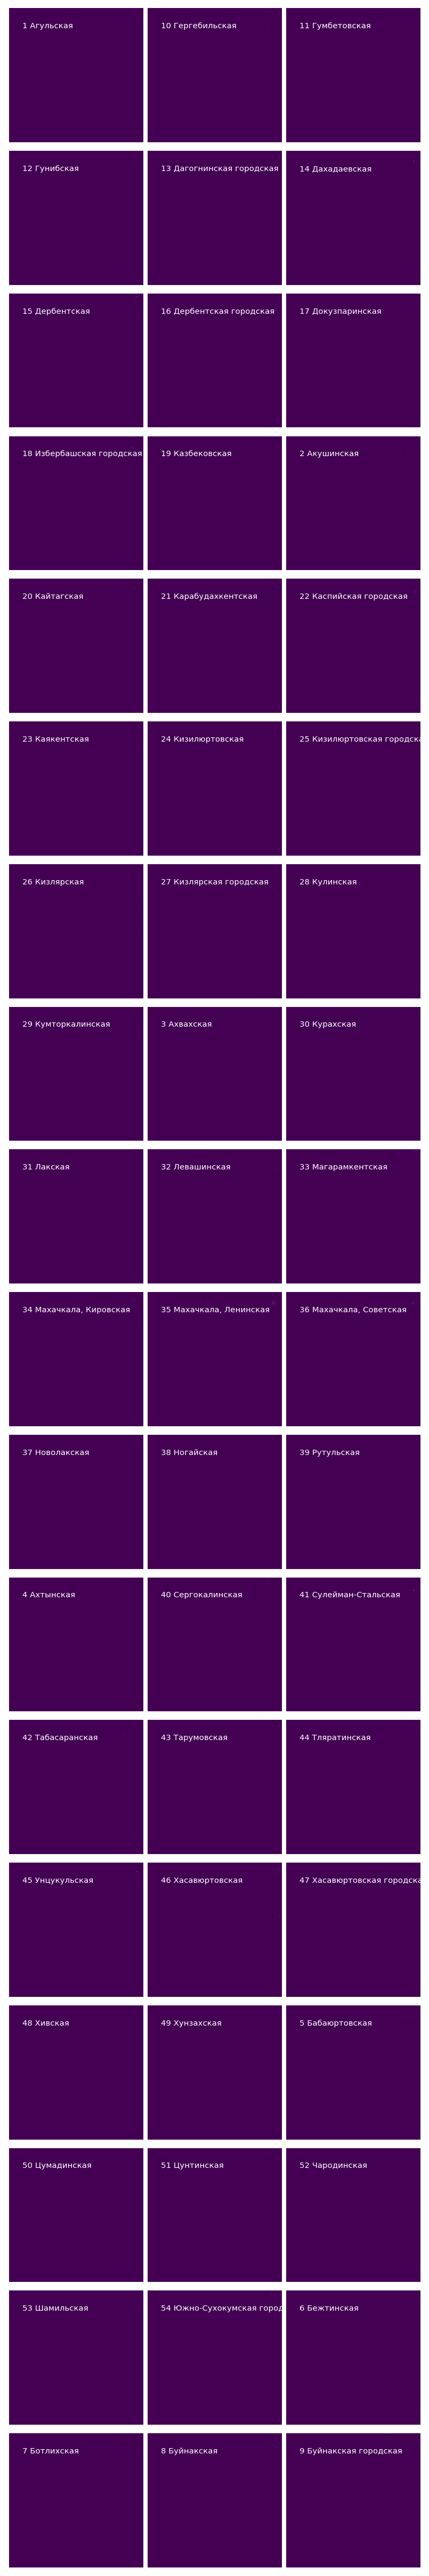

In [5]:
# 2D histograms for all TIKs in a given year and a given region

year = 2016
reg = 'Республика Дагестан'
binwidth = 0.5

voters, given, received, leader, regions, tiks = loaddata(year)

edges = np.arange(-binwidth/2, 100+binwidth/2, binwidth)
centers = np.arange(0,100,binwidth)

num = np.unique(tiks[regions==reg]).size

plt.figure(figsize=(9,num))
for i,r in enumerate(np.unique(tiks[regions==reg])):
    plt.subplot(np.ceil(num/3), 3, i+1)
    ind = (received > 0) & (given < voters) & (voters >= minSize) & (regions==reg) & (tiks == r)
    h = np.histogram2d(100 * given[ind]/voters[ind], 100 * leader[ind]/received[ind], 
                       bins=edges, weights = voters[ind])[0]
    plt.imshow(h.T, vmin=0, vmax=50000, origin='lower', extent=[0,100,0,100], 
               cmap=plt.get_cmap('viridis'), interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.text(10,85, r, color='w')

plt.tight_layout()